# regression model based problem

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df.shape

(500, 9)

In [13]:
df.drop(columns= ['Serial No.'], inplace = True)

In [14]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [61]:
#extract x and y

x= df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [62]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [63]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [64]:
##we gotta scale the dta by minmax
#bcz in sop, lor.. values are so close n they create prblm 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1 )

In [65]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [66]:
#SCLAING

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [67]:

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [68]:
x_train_scaled


array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [69]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [76]:
#build the neural n/w

model = Sequential()

In [77]:
model.add(Dense(7, activation = 'relu', input_dim=7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 7)                 56        
                                                                 
 dense_14 (Dense)            (None, 7)                 56        
                                                                 
 dense_15 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model.compile(loss= 'mean_squared_error', optimizer= 'Adam', metrics = 'accuracy')

In [80]:
history = model.fit(x_train_scaled, y_train, epochs = 100, validation_split= 0.2)

Epoch 1/100
10/10 [==============================] - 2s 43ms/step - loss: 0.7856 - accuracy: 0.0000e+00 - val_loss: 0.7274 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5736 - accuracy: 0.0000e+00 - val_loss: 0.5299 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4218 - accuracy: 0.0000e+00 - val_loss: 0.4006 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3236 - accuracy: 0.0000e+00 - val_loss: 0.3154 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2570 - accuracy: 0.0000e+00 - val_loss: 0.2509 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2039 - accuracy: 0.0000e+00 - val_loss: 0.1983 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1605 - accuracy: 0.0000e+00 -

In [81]:
y_pred = model.predict(x_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [88]:
from sklearn.metrics import r2_score
r2_score( y_test, y_pred)

##Rsquared repreents the proportion of target varivale obtained from independant variable 
##value lies betweeen 0 and 1
# 0= no variability
#1= very good variability in the target variable

0.7943471650134443

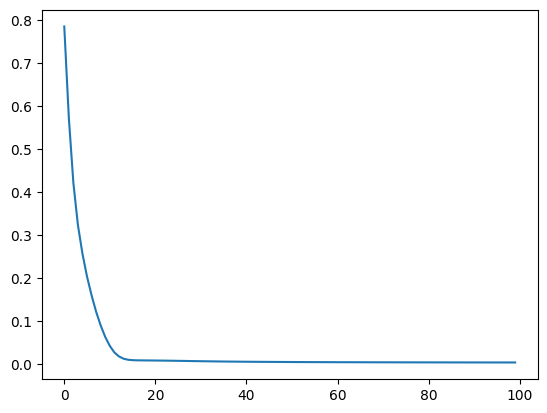

In [84]:
plt.plot(history.history['loss'])

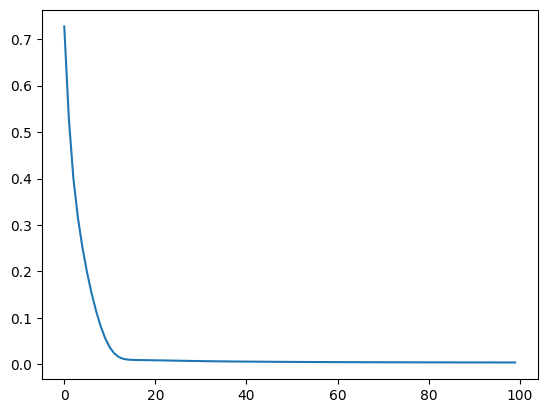

In [86]:
plt.plot(history.history['val_loss'])